## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
data = pd.read_csv('Crude Oil WTI Futures Historical Data.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 02, 2003",30.71,29.49,30.84,29.49,90.95K,3.89%
1,"Jun 03, 2003",30.67,30.65,30.86,30.33,59.00K,-0.13%
2,"Jun 04, 2003",30.05,30.78,31.00,29.90,96.89K,-2.02%
3,"Jun 05, 2003",30.74,30.05,30.82,29.65,81.56K,2.30%
4,"Jun 06, 2003",31.28,30.78,31.30,30.65,71.45K,1.76%
...,...,...,...,...,...,...,...
4901,"Jun 27, 2022",109.57,107.22,110.54,105.60,282.91K,1.81%
4902,"Jun 28, 2022",111.76,110.18,112.22,109.62,306.75K,2.00%
4903,"Jun 29, 2022",109.78,111.86,114.05,109.22,322.06K,-1.77%
4904,"Jun 30, 2022",105.76,109.70,110.45,105.10,362.89K,-3.66%


In [3]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 02, 2003",30.71,29.49,30.84,29.49,90.95K,3.89%
1,"Jun 03, 2003",30.67,30.65,30.86,30.33,59.00K,-0.13%
2,"Jun 04, 2003",30.05,30.78,31.00,29.90,96.89K,-2.02%
3,"Jun 05, 2003",30.74,30.05,30.82,29.65,81.56K,2.30%
4,"Jun 06, 2003",31.28,30.78,31.30,30.65,71.45K,1.76%
...,...,...,...,...,...,...,...
4901,"Jun 27, 2022",109.57,107.22,110.54,105.60,282.91K,1.81%
4902,"Jun 28, 2022",111.76,110.18,112.22,109.62,306.75K,2.00%
4903,"Jun 29, 2022",109.78,111.86,114.05,109.22,322.06K,-1.77%
4904,"Jun 30, 2022",105.76,109.70,110.45,105.10,362.89K,-3.66%


## EDA

In [4]:
data.shape

(4906, 7)

In [5]:
data.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [6]:
data.shape

(4906, 7)

In [7]:
data.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [8]:
data.shape

(4906, 7)

In [9]:
data.describe(include='all')

,Date,Price,Open,High,Low,Vol.,Change %
count,4906,4906.000000,4906.000000,4906.000000,4906.000000,4906,4906
unique,4906,NaN,NaN,NaN,NaN,4598,1072
top,"Jun 02, 2003",NaN,NaN,NaN,NaN,-,0.97%
freq,1,NaN,NaN,NaN,NaN,107,20
mean,NaN,67.998526,68.003062,69.027246,66.899289,NaN,NaN
std,NaN,23.539850,23.511689,23.721167,23.294412,NaN,NaN
min,NaN,-37.630000,-14.000000,13.690000,-40.320000,NaN,NaN
25%,NaN,49.620000,49.600000,50.442500,48.800000,NaN,NaN
50%,NaN,63.855000,63.860000,64.780000,63.015000,NaN,NaN
75%,NaN,87.262500,87.410000,88.517500,86.057500,NaN,NaN


In [10]:
data['High'].max()

147.27

In [11]:
data[data['High']==147.27]

,Date,Price,Open,High,Low,Vol.,Change %
1282,"Jul 11, 2008",145.08,141.8,147.27,141.44,334.94K,2.42%


In [12]:
data['Low'].min()

-40.32

In [13]:
data[data['Low']==-40.32]

,Date,Price,Open,High,Low,Vol.,Change %
4325,"Apr 20, 2020",-37.63,17.73,17.85,-40.32,247.95K,-305.97%


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2003-06-02,30.71,29.49,30.84,29.49,90.95K,3.89%
1,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%
2,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%
3,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%
4,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%
...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,107.22,110.54,105.60,282.91K,1.81%
4902,2022-06-28,111.76,110.18,112.22,109.62,306.75K,2.00%
4903,2022-06-29,109.78,111.86,114.05,109.22,322.06K,-1.77%
4904,2022-06-30,105.76,109.70,110.45,105.10,362.89K,-3.66%


In [15]:
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

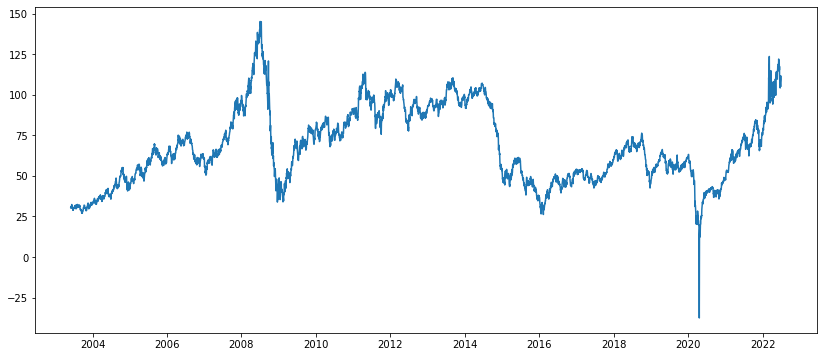

In [16]:
plt.figure(figsize=(14,6))
plt.plot(data['Date'],data['Price'])
plt.show()

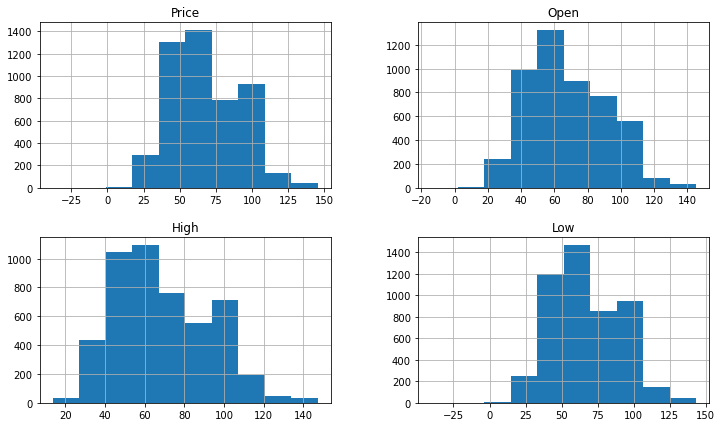

In [17]:
data.hist(column=['Price','Open','High','Low'],figsize=(12,7))
plt.show()

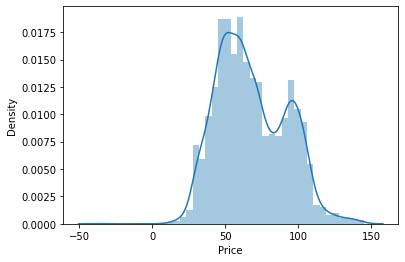

In [18]:
sns.distplot(data['Price'])
plt.show()

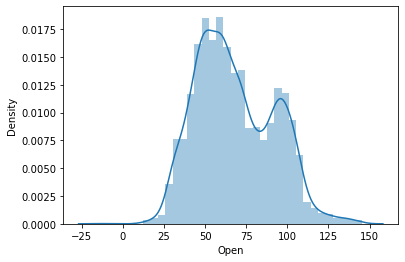

In [19]:
sns.distplot(data['Open'])
plt.show()

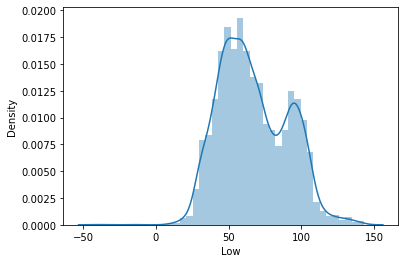

In [20]:
sns.distplot(data['Low'])
plt.show()

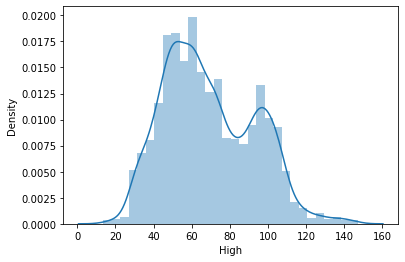

In [21]:
sns.distplot(data['High'])
plt.show()

In [22]:
data['date'] = data.Date.dt.strftime('%d')
data['Month'] = data.Date.dt.strftime('%b')
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Date,Price,Open,High,Low,Vol.,Change %,date,Month,Year
0,2003-06-02,30.71,29.49,30.84,29.49,90.95K,3.89%,02,Jun,2003
1,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%,03,Jun,2003
2,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%,04,Jun,2003
3,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%,05,Jun,2003
4,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%,06,Jun,2003
...,...,...,...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,107.22,110.54,105.60,282.91K,1.81%,27,Jun,2022
4902,2022-06-28,111.76,110.18,112.22,109.62,306.75K,2.00%,28,Jun,2022
4903,2022-06-29,109.78,111.86,114.05,109.22,322.06K,-1.77%,29,Jun,2022
4904,2022-06-30,105.76,109.70,110.45,105.10,362.89K,-3.66%,30,Jun,2022


### Heat map to check average price at each month for every year

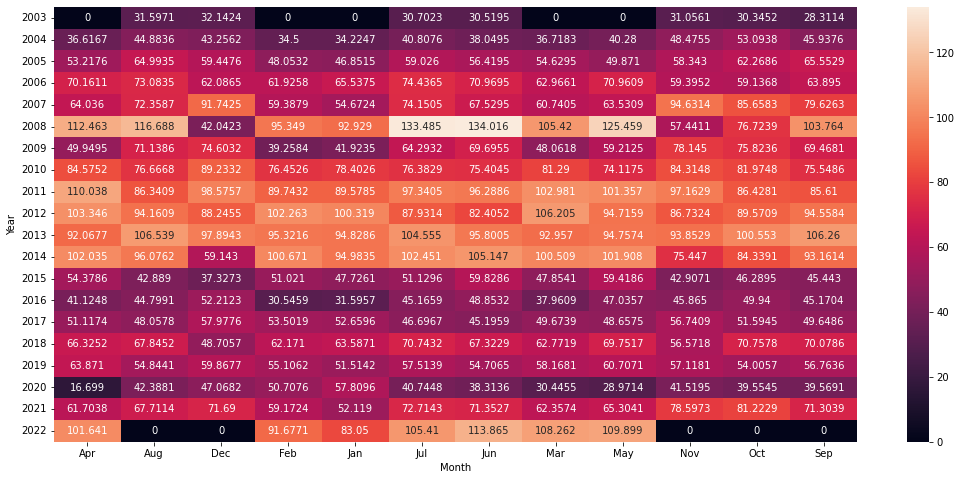

In [23]:
plt.figure(figsize=(18,8))
heatmap_y_month = pd.pivot_table(data=data,values="Price",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

Here we can see that in june 2008 the oil price was at peak and in april 2020 oil price was minimum.

### Box plot to check for outliers 

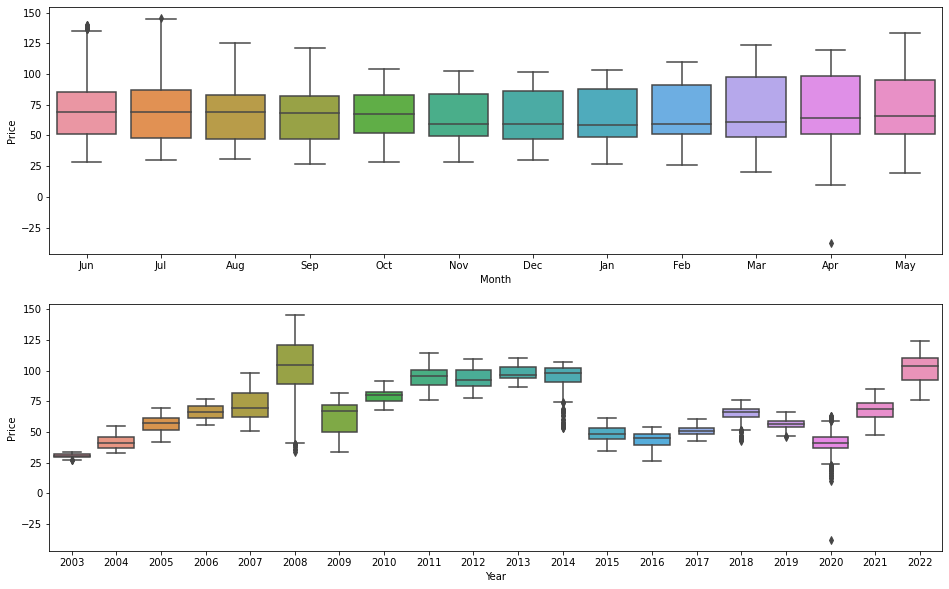

In [24]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
sns.boxplot(x='Month',y='Price',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='Year',y='Price',data=data)
plt.show()

From boxplot we can see that we have most number of outliers in year 2014, 2018 and 2020

#### Plotting for 2014, 2018 and 2020 to know how exactly price distribution is

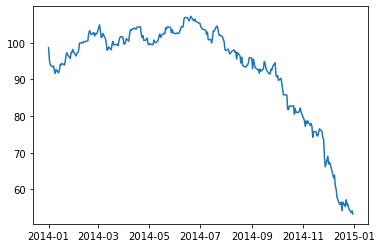

In [25]:
data_2014 = data[data['Year']==2014]
plt.plot(data_2014['Date'],data_2014['Price'])
plt.show()

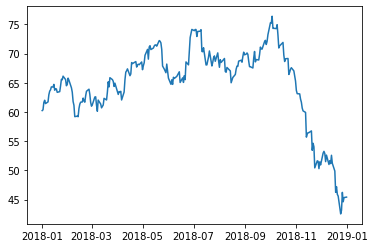

In [26]:
data_2018 = data[data['Year']==2018]
plt.plot(data_2018['Date'],data_2018['Price'])
plt.show()

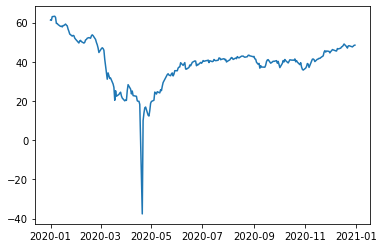

In [27]:
data_2020 = data[data['Year']==2020]
plt.plot(data_2020['Date'],data_2020['Price'])
plt.show()

In 2014 the oil price started droping from july till end of the year where as for in 2018 oil price rapidly dropped from october to end of the year.
in 2020 due to covid the oil price reached its lowest price ever in histroy recording -40$ per barrel.

### Checking for trend and seasonality

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

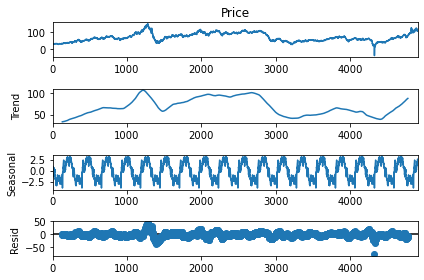

In [29]:
decompose_ts_add = seasonal_decompose(data.Price,period=262)
decompose_ts_add.plot()
plt.show()

### Autocorelation using lagplot

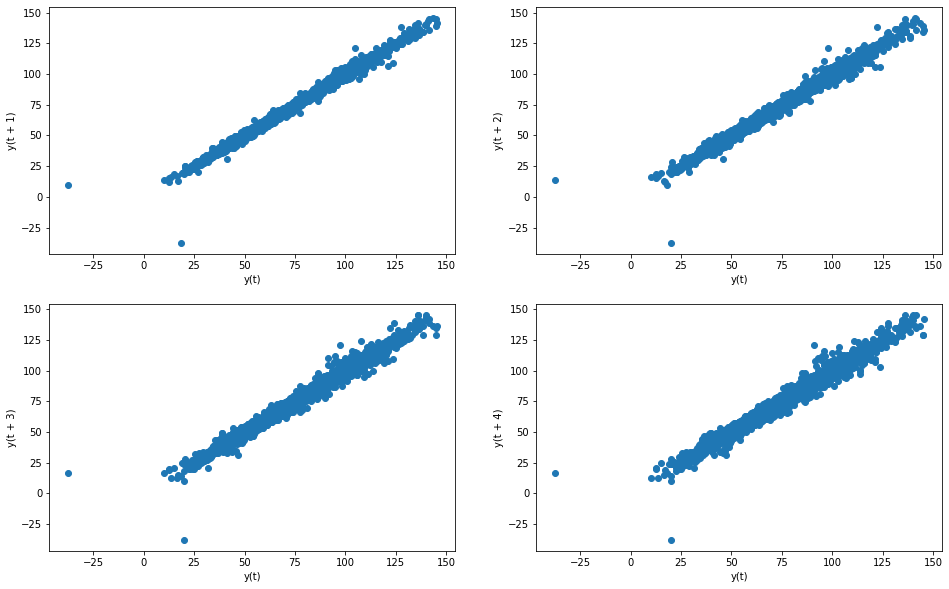

In [30]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
pd.plotting.lag_plot(data['Price'],lag=1)
plt.subplot(2,2,2)
pd.plotting.lag_plot(data['Price'],lag=2)
plt.subplot(2,2,3)
pd.plotting.lag_plot(data['Price'],lag=3)
plt.subplot(2,2,4)
pd.plotting.lag_plot(data['Price'],lag=4)
plt.show()

### ACF and PACF plots

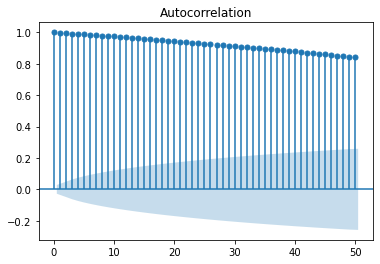

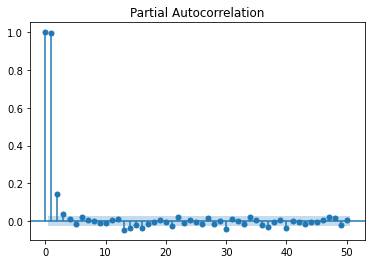

In [31]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Price,lags=50)
tsa_plots.plot_pacf(data.Price,lags=50)
plt.show()


Since in ACF all the observations are significant we can't use MA model, also we have many significant values in PACF plot too so we can't use AR model. Here we will go with ARMA OR ARIMA madel to forecast.

###  Check for stationary of data

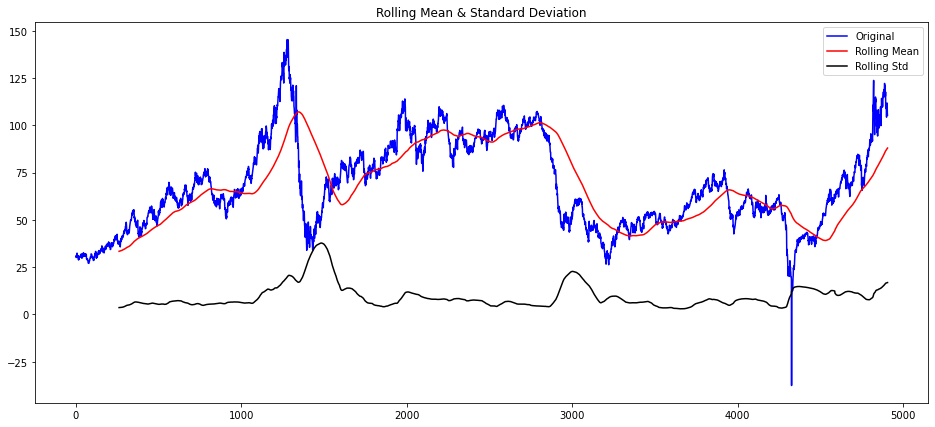

In [32]:
rolLmean = data['Price'].rolling(262).mean() 
rolLstd = data['Price'].rolling(262).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(data['Price'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Here out data is not stationary so we used some transfomation techniques.

In [33]:
from statsmodels.tsa.stattools import adfuller
adfuller_results = adfuller(data['Price'])
adfuller_results = pd.Series(adfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
adfuller_results

Test Statistic                   -2.774933
p-value                           0.061945
#Lags Used                       29.000000
Number of Observations Used    4876.000000
dtype: float64

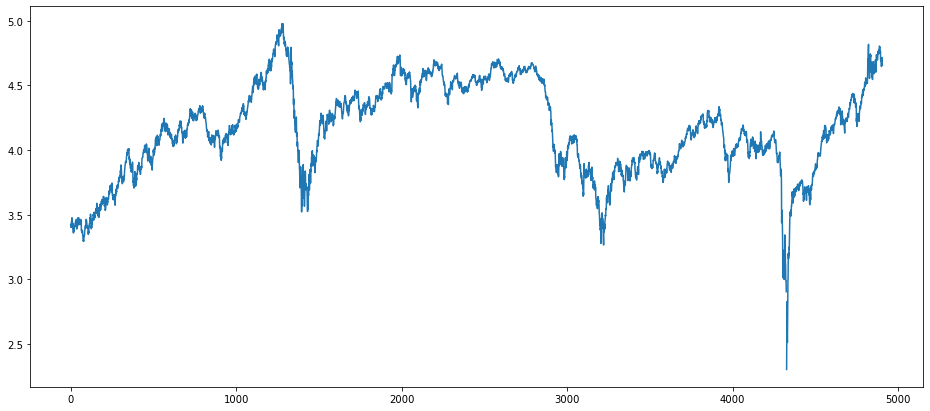

In [34]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
data['Price_log'] = np.log(data['Price'])#to transform to stationary from non-stationary
plt.plot(data['Price_log'])
plt.show()

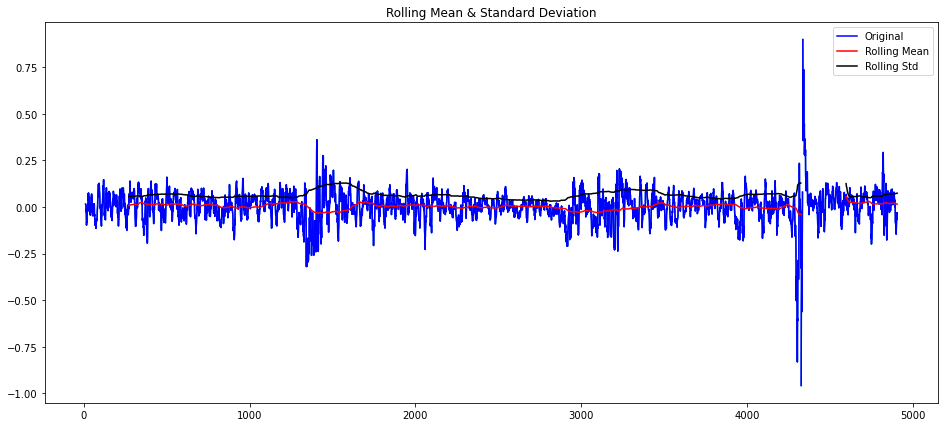

In [35]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = data['Price_log']- data['Price_log'].shift(periods=10) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(262).mean()
rolLstd = ts_log_diff.rolling(262).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [36]:
data = data.fillna(method='ffill')

In [37]:
from statsmodels.tsa.stattools import adfuller
adfuller_results = adfuller(data['Price_log'])
adfuller_results = pd.Series(adfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
adfuller_results

Test Statistic                   -3.193879
p-value                           0.020342
#Lags Used                       30.000000
Number of Observations Used    4875.000000
dtype: float64

## Data Preperation

In [38]:
data

,Date,Price,Open,High,Low,Vol.,Change %,date,Month,Year,Price_log
0,2003-06-02,30.71,29.49,30.84,29.49,90.95K,3.89%,02,Jun,2003,3.424588
1,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%,03,Jun,2003,3.423285
2,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%,04,Jun,2003,3.402863
3,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%,05,Jun,2003,3.425565
4,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%,06,Jun,2003,3.442979
...,...,...,...,...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,107.22,110.54,105.60,282.91K,1.81%,27,Jun,2022,4.696564
4902,2022-06-28,111.76,110.18,112.22,109.62,306.75K,2.00%,28,Jun,2022,4.716354
4903,2022-06-29,109.78,111.86,114.05,109.22,322.06K,-1.77%,29,Jun,2022,4.698478
4904,2022-06-30,105.76,109.70,110.45,105.10,362.89K,-3.66%,30,Jun,2022,4.661172


In [39]:
data_mbf = data[['Date','Price','Month','Year','date']]
data_mbf

,Date,Price,Month,Year,date
0,2003-06-02,30.71,Jun,2003,02
1,2003-06-03,30.67,Jun,2003,03
2,2003-06-04,30.05,Jun,2003,04
3,2003-06-05,30.74,Jun,2003,05
4,2003-06-06,31.28,Jun,2003,06
...,...,...,...,...,...
4901,2022-06-27,109.57,Jun,2022,27
4902,2022-06-28,111.76,Jun,2022,28
4903,2022-06-29,109.78,Jun,2022,29
4904,2022-06-30,105.76,Jun,2022,30


data_mbf['Price'] = data_mbf['Price'].replace(-37.63,0)
data_mbf.isna().sum()

data_mbf = np.log(data_mbf['Price'])
data_mbf

In [40]:
data_mbf['t'] = range(1,4907)

In [41]:
data_mbf['t_squre'] = np.square(data_mbf['t'])

In [42]:
data_mbf['log_price'] = np.log(data_mbf['Price'])

In [43]:
data_mbf

,Date,Price,Month,Year,date,t,t_squre,log_price
0,2003-06-02,30.71,Jun,2003,02,1,1,3.424588
1,2003-06-03,30.67,Jun,2003,03,2,4,3.423285
2,2003-06-04,30.05,Jun,2003,04,3,9,3.402863
3,2003-06-05,30.74,Jun,2003,05,4,16,3.425565
4,2003-06-06,31.28,Jun,2003,06,5,25,3.442979
...,...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,Jun,2022,27,4902,24029604,4.696564
4902,2022-06-28,111.76,Jun,2022,28,4903,24039409,4.716354
4903,2022-06-29,109.78,Jun,2022,29,4904,24049216,4.698478
4904,2022-06-30,105.76,Jun,2022,30,4905,24059025,4.661172


In [44]:
data_mbf = pd.get_dummies(data_mbf,columns=['date'])
data_mbf

,Date,Price,Month,Year,t,t_squre,log_price,date_01,date_02,date_03,...,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31
0,2003-06-02,30.71,Jun,2003,1,1,3.424588,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2003-06-03,30.67,Jun,2003,2,4,3.423285,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2003-06-04,30.05,Jun,2003,3,9,3.402863,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2003-06-05,30.74,Jun,2003,4,16,3.425565,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003-06-06,31.28,Jun,2003,5,25,3.442979,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,Jun,2022,4902,24029604,4.696564,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4902,2022-06-28,111.76,Jun,2022,4903,24039409,4.716354,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4903,2022-06-29,109.78,Jun,2022,4904,24049216,4.698478,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4904,2022-06-30,105.76,Jun,2022,4905,24059025,4.661172,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting Data

In [45]:
train = data_mbf.head(4906-266)
test  = data_mbf.tail(266)

In [46]:
train.shape,test.shape

((4640, 38), (266, 38))

# Model Based Forecasting

In [47]:
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.formula.api as smf

### Linear Model

In [48]:
linear = smf.ols('Price~t',data=train).fit()
pred_linear = linear.predict(test['t'])
rmse_linear = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_linear))**2))
rmse_linear

30.49363281972473

### Exponential Model

In [49]:
exponential = smf.ols('log_price~t',data=train).fit()
pred_exponential = exponential.predict(test['t'])
rmse_exponential = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_exponential))**2))
rmse_exponential

85.3157254286183

### Quadratic Model

In [50]:
quadratic = smf.ols('Price~t+t_squre',data=train).fit()
pred_quadratic = quadratic.predict(test[['t','t_squre']])
rmse_quadratic = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_quadratic))**2))
rmse_quadratic

66.59664562979282

### Additive seasonality 

In [51]:
additive = smf.ols('Price~date_01+date_02+date_03+date_04+date_05+date_06+date_07+date_08+date_09+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23+date_24+date_25+date_26+date_27+date_28+date_29+date_30+date_31',data=train).fit()
pred_additive = additive.predict(test[['date_01','date_02', 'date_03', 'date_04', 'date_05', 'date_06', 'date_07','date_08', 'date_09', 'date_10', 'date_11', 'date_12', 'date_13','date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19','date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25','date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31']])
rmse_additive = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_additive))**2))
rmse_additive

26.738311180547132

### Additive Quadratic seasonality 

In [52]:
additive_quadratic = smf.ols('Price~t+t_squre+date_01+date_02+date_03+date_04+date_05+date_06+date_07+date_08+date_09+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23+date_24+date_25+date_26+date_27+date_28+date_29+date_30+date_31',data=train).fit()
pred_additive_quadratic = additive_quadratic.predict(test[['t','t_squre','date_01','date_02', 'date_03', 'date_04', 'date_05', 'date_06', 'date_07','date_08', 'date_09', 'date_10', 'date_11', 'date_12', 'date_13','date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19','date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25','date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31']])
rmse_additive_quadratic = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_additive_quadratic))**2))
rmse_additive_quadratic

66.60213176070148

### Multiplicative seasonality 

In [53]:
multiplicative = smf.ols('log_price~date_01+date_02+date_03+date_04+date_05+date_06+date_07+date_08+date_09+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23+date_24+date_25+date_26+date_27+date_28+date_29+date_30+date_31',data=train).fit()
pred_multiplicative = multiplicative.predict(test[['date_01','date_02', 'date_03', 'date_04', 'date_05', 'date_06', 'date_07','date_08', 'date_09', 'date_10', 'date_11', 'date_12', 'date_13','date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19','date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25','date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31']])
rmse_multiplicative = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_multiplicative))**2))
rmse_multiplicative

85.26373026787115

### Multiplicative Additive seasonality 

In [54]:
multiplicative_additive = smf.ols('log_price~t+date_01+date_02+date_03+date_04+date_05+date_06+date_07+date_08+date_09+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23+date_24+date_25+date_26+date_27+date_28+date_29+date_30+date_31',data=train).fit()
pred_multiplicative_additive = multiplicative_additive.predict(test[['t','date_01','date_02', 'date_03', 'date_04', 'date_05', 'date_06', 'date_07','date_08', 'date_09', 'date_10', 'date_11', 'date_12', 'date_13','date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19','date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25','date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31']])
rmse_multiplicative_additive = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_multiplicative_additive))**2))
rmse_multiplicative_additive

85.31575984164749

### Compare the results

In [55]:
result = {'Models':['Linear Model','Exponential Model','Quadratic Model','Additive seasonality','Additive Quadratic seasonality','Multiplicative seasonality','Multiplicative Additive seasonality'],
          'RMSE':[30.4936,85.3157,66.5966,26.7383,66.6021,85.2637,85.3157]}

In [56]:
result = pd.DataFrame(data=result)
result

,Models,RMSE
0,Linear Model,30.4936
1,Exponential Model,85.3157
2,Quadratic Model,66.5966
3,Additive seasonality,26.7383
4,Additive Quadratic seasonality,66.6021
5,Multiplicative seasonality,85.2637
6,Multiplicative Additive seasonality,85.3157


In [57]:
result.sort_values(by='RMSE')

,Models,RMSE
3,Additive seasonality,26.7383
0,Linear Model,30.4936
2,Quadratic Model,66.5966
4,Additive Quadratic seasonality,66.6021
5,Multiplicative seasonality,85.2637
1,Exponential Model,85.3157
6,Multiplicative Additive seasonality,85.3157


From above table for Additive seasonality model we got the less Root mean squred error so we will built model using Additive seasonality.

### Build the model for entire dataset

In [58]:
data_mbf

,Date,Price,Month,Year,t,t_squre,log_price,date_01,date_02,date_03,...,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31
0,2003-06-02,30.71,Jun,2003,1,1,3.424588,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2003-06-03,30.67,Jun,2003,2,4,3.423285,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2003-06-04,30.05,Jun,2003,3,9,3.402863,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2003-06-05,30.74,Jun,2003,4,16,3.425565,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003-06-06,31.28,Jun,2003,5,25,3.442979,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,Jun,2022,4902,24029604,4.696564,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4902,2022-06-28,111.76,Jun,2022,4903,24039409,4.716354,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4903,2022-06-29,109.78,Jun,2022,4904,24049216,4.698478,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4904,2022-06-30,105.76,Jun,2022,4905,24059025,4.661172,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
full_model = smf.ols('Price~date_01+date_02+date_03+date_04+date_05+date_06+date_07+date_08+date_09+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23+date_24+date_25+date_26+date_27+date_28+date_29+date_30+date_31',data=data_mbf).fit()


### Create forecasting data frame

In [60]:
forecast_data = pd.date_range(start="2022-07-01",end="2023-06-30",freq='B',name='Date')
forecast_data

DatetimeIndex(['2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14',
               ...
               '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', name='Date', length=261, freq='B')

In [61]:
forecast_data = pd.DataFrame(data=forecast_data)
forecast_data['date'] = forecast_data.Date.dt.strftime('%d')
forecast_data = pd.get_dummies(forecast_data,columns=['date'])
forecast_data['Month'] = forecast_data.Date.dt.strftime('%b')
forecast_data['Year'] = pd.DatetimeIndex(forecast_data['Date']).year
forecast_data['t'] = range(4907,4907+261)
forecast_data['t_squre'] = np.square(forecast_data['t'])

In [62]:
forecast_data

,Date,date_01,date_02,date_03,date_04,date_05,date_06,date_07,date_08,date_09,...,date_26,date_27,date_28,date_29,date_30,date_31,Month,Year,t,t_squre
0,2022-07-01,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Jul,2022,4907,24078649
1,2022-07-04,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,Jul,2022,4908,24088464
2,2022-07-05,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,Jul,2022,4909,24098281
3,2022-07-06,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,Jul,2022,4910,24108100
4,2022-07-07,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,Jul,2022,4911,24117921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-06-26,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Jun,2023,5163,26656569
257,2023-06-27,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,Jun,2023,5164,26666896
258,2023-06-28,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,Jun,2023,5165,26677225
259,2023-06-29,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Jun,2023,5166,26687556


In [63]:
data_mbf['t'] = range(1,4907)
data_mbf['t_squre'] = np.square(data_mbf['t'])
data_mbf['log_price'] = np.log(data_mbf['Price'])

### Forecasting the next one year price

In [64]:
pred_forecast = full_model.predict(forecast_data[['date_01','date_02', 'date_03', 'date_04', 'date_05', 'date_06', 'date_07','date_08', 'date_09', 'date_10', 'date_11', 'date_12', 'date_13','date_14', 'date_15', 'date_16', 'date_17', 'date_18', 'date_19','date_20', 'date_21', 'date_22', 'date_23', 'date_24', 'date_25','date_26', 'date_27', 'date_28', 'date_29', 'date_30', 'date_31']])
forecast_data['Price_new'] = pd.DataFrame(data=pred_forecast,columns=['Price_new'])
forecast_data

,Date,date_01,date_02,date_03,date_04,date_05,date_06,date_07,date_08,date_09,...,date_27,date_28,date_29,date_30,date_31,Month,Year,t,t_squre,Price_new
0,2022-07-01,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Jul,2022,4907,24078649,68.554103
1,2022-07-04,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Jul,2022,4908,24088464,67.839241
2,2022-07-05,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,Jul,2022,4909,24098281,67.551950
3,2022-07-06,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,Jul,2022,4910,24108100,67.406832
4,2022-07-07,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,Jul,2022,4911,24117921,68.661049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-06-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Jun,2023,5163,26656569,67.694650
257,2023-06-27,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,Jun,2023,5164,26666896,68.475123
258,2023-06-28,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,Jun,2023,5165,26677225,69.036708
259,2023-06-29,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,Jun,2023,5166,26687556,68.157843


In [65]:
full_data = pd.concat([data_mbf,forecast_data])
full_data[['Price','Price_new']]

,Price,Price_new
0,30.71,NaN
1,30.67,NaN
2,30.05,NaN
3,30.74,NaN
4,31.28,NaN
...,...,...
256,NaN,67.694650
257,NaN,68.475123
258,NaN,69.036708
259,NaN,68.157843


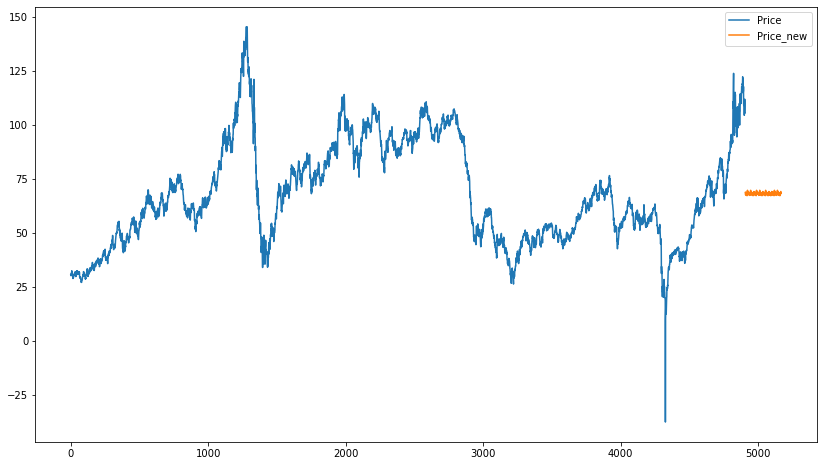

In [66]:

forecasting_plot = full_data[['Price','Price_new']].reset_index(drop=True).plot(figsize=(14,8))
forecasting_plot
plt.show()

Here in our model for 2022-07-01 its forecasting a price of 68.5541 but in actual its 108.43 so we facing a large difference so our model based forecasting technique is falied so we will go for data driven forecasting techniques

## Data Driven Forecasting

In [67]:
data

,Date,Price,Open,High,Low,Vol.,Change %,date,Month,Year,Price_log
0,2003-06-02,30.71,29.49,30.84,29.49,90.95K,3.89%,02,Jun,2003,3.424588
1,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%,03,Jun,2003,3.423285
2,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%,04,Jun,2003,3.402863
3,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%,05,Jun,2003,3.425565
4,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%,06,Jun,2003,3.442979
...,...,...,...,...,...,...,...,...,...,...,...
4901,2022-06-27,109.57,107.22,110.54,105.60,282.91K,1.81%,27,Jun,2022,4.696564
4902,2022-06-28,111.76,110.18,112.22,109.62,306.75K,2.00%,28,Jun,2022,4.716354
4903,2022-06-29,109.78,111.86,114.05,109.22,322.06K,-1.77%,29,Jun,2022,4.698478
4904,2022-06-30,105.76,109.70,110.45,105.10,362.89K,-3.66%,30,Jun,2022,4.661172


In [68]:
data_ddf = data[['Date','Price']]
data_ddf

,Date,Price
0,2003-06-02,30.71
1,2003-06-03,30.67
2,2003-06-04,30.05
3,2003-06-05,30.74
4,2003-06-06,31.28
...,...,...
4901,2022-06-27,109.57
4902,2022-06-28,111.76
4903,2022-06-29,109.78
4904,2022-06-30,105.76


In [69]:
data_ddf[data_ddf['Price']<0]

,Date,Price
4325,2020-04-20,-37.63


In [70]:
data_ddf = data_ddf.drop(index=4325)
data_ddf

,Date,Price
0,2003-06-02,30.71
1,2003-06-03,30.67
2,2003-06-04,30.05
3,2003-06-05,30.74
4,2003-06-06,31.28
...,...,...
4901,2022-06-27,109.57
4902,2022-06-28,111.76
4903,2022-06-29,109.78
4904,2022-06-30,105.76


In [71]:
data_ddf['log_price'] = np.log(data_ddf['Price'])
data_ddf

,Date,Price,log_price
0,2003-06-02,30.71,3.424588
1,2003-06-03,30.67,3.423285
2,2003-06-04,30.05,3.402863
3,2003-06-05,30.74,3.425565
4,2003-06-06,31.28,3.442979
...,...,...,...
4901,2022-06-27,109.57,4.696564
4902,2022-06-28,111.76,4.716354
4903,2022-06-29,109.78,4.698478
4904,2022-06-30,105.76,4.661172


In [72]:
data_ddf['Date'] = pd.to_datetime(data_ddf['Date'])
data_ddf

,Date,Price,log_price
0,2003-06-02,30.71,3.424588
1,2003-06-03,30.67,3.423285
2,2003-06-04,30.05,3.402863
3,2003-06-05,30.74,3.425565
4,2003-06-06,31.28,3.442979
...,...,...,...
4901,2022-06-27,109.57,4.696564
4902,2022-06-28,111.76,4.716354
4903,2022-06-29,109.78,4.698478
4904,2022-06-30,105.76,4.661172


In [73]:
data_ddf.dtypes

Date         datetime64[ns]
Price               float64
log_price           float64
dtype: object

### Moving Average

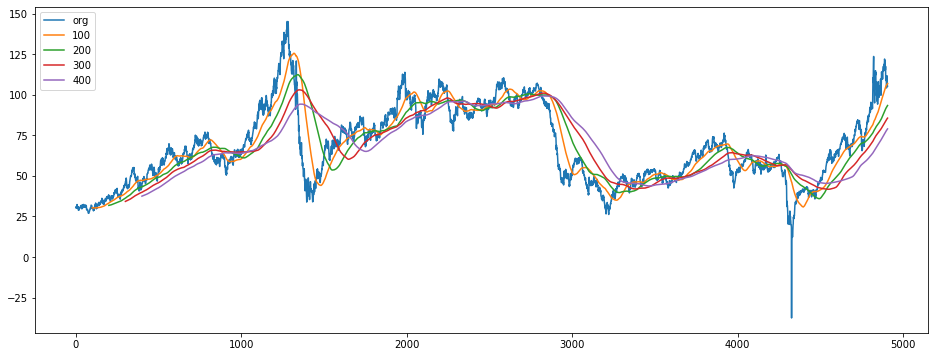

In [74]:
plt.figure(figsize=(16,6))
data['Price'].plot(label="org")
for i in range(100,500,100):
    data_ddf['Price'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

# Splitting Data

In [75]:
train = data_ddf.head(4906-266)
test  = data_ddf.tail(266)

In [76]:
train.shape,test.shape

((4640, 3), (266, 3))

### Simple Exponential Smoothing Model

##### Forecast based on current time

In [77]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
simple_exp = SimpleExpSmoothing(train['log_price'])
simple_exp = simple_exp.fit(smoothing_level=0.2)
pred_simple_exp = simple_exp.predict(start = test.index[0],end = test.index[-1])
rmse_simple_exp = np.sqrt(np.mean((np.array(test['log_price'])-np.array(pred_simple_exp))**2))
rmse_simple_exp

0.24698048897086405

### Holt Model

##### Forecast based on current time and trend

In [78]:
from statsmodels.tsa.holtwinters import Holt
holt_model = Holt(train['log_price'])
holt_model = holt_model.fit(smoothing_level=0.8,smoothing_trend=0.2)
pred_holt  = holt_model.predict(start=test.index[0],end=test.index[-1])
rmse_holt = np.sqrt(np.mean((np.array(test['log_price'])-np.array(pred_holt))**2))
rmse_holt

0.6269593399954311

### Holts winter exponential smoothing 

##### Forecast based on current time, trend and seasonality

### with  additive trend and additive seasonality

In [79]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_add_add = ExponentialSmoothing(train['log_price'],trend='add',seasonal='add',seasonal_periods=262)
hwe_add_add = hwe_add_add.fit()
pred_hwe_add_add = hwe_add_add.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_add_add = np.sqrt(np.mean((np.array(test['log_price'])-np.array(pred_hwe_add_add))**2))
rmse_hwe_add_add

0.2366983445232995

### with  additive trend and multiclative seasonality

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_add_mul = ExponentialSmoothing(train['log_price'],trend='add',seasonal='mul',seasonal_periods=262)
hwe_add_mul = hwe_add_mul.fit()
pred_hwe_add_mul = hwe_add_mul.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_add_mul = np.sqrt(np.mean((np.array(test['log_price'])-np.array(np.exp(pred_hwe_add_mul)))**2))
rmse_hwe_add_mul

99.91462044213021

### with  multiclative trend and additive seasonality

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_mul_add = ExponentialSmoothing(train['log_price'],trend='mul',seasonal='add',seasonal_periods=262)
hwe_mul_add = hwe_mul_add.fit()
pred_hwe_mul_add = hwe_mul_add.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_mul_add = np.sqrt(np.mean((np.array(test['log_price'])-np.array(pred_hwe_mul_add))**2))
rmse_hwe_mul_add

0.17768337982291613

### with  multiclative trend and multiclative seasonality

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_mul_mul = ExponentialSmoothing(train['log_price'],trend='mul',seasonal='mul',seasonal_periods=262)
hwe_mul_mul = hwe_mul_mul.fit()
pred_hwe_mul_mul = hwe_mul_mul.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_mul_mul = np.sqrt(np.mean((np.array(test['log_price'])-np.array(pred_hwe_mul_mul))**2))
rmse_hwe_mul_mul

0.32037910118633056

### Compare the results

In [83]:
result = {'Models':['Simple Exponential Smoothing Model','Holt Model','Holts winter exponential smoothing with additive trend and additive seasonality','Holts winter exponential smoothing with additive trend and multiclative seasonality','Holts winter exponential smoothing with multiclative trend and additive seasonality','Holts winter exponential smoothing with multiclative trend and multiclative seasonality'],
          'RMSE':[0.24698,0.62695,0.23669,99.91462,0.17768,0.32037]}

In [84]:
pd.set_option('max_colwidth', None)
result = pd.DataFrame(data=result)
result

,Models,RMSE
0,Simple Exponential Smoothing Model,0.24698
1,Holt Model,0.62695
2,Holts winter exponential smoothing with additive trend and additive seasonality,0.23669
3,Holts winter exponential smoothing with additive trend and multiclative seasonality,99.91462
4,Holts winter exponential smoothing with multiclative trend and additive seasonality,0.17768
5,Holts winter exponential smoothing with multiclative trend and multiclative seasonality,0.32037


In [85]:
result.sort_values(by='RMSE')

,Models,RMSE
4,Holts winter exponential smoothing with multiclative trend and additive seasonality,0.17768
2,Holts winter exponential smoothing with additive trend and additive seasonality,0.23669
0,Simple Exponential Smoothing Model,0.24698
5,Holts winter exponential smoothing with multiclative trend and multiclative seasonality,0.32037
1,Holt Model,0.62695
3,Holts winter exponential smoothing with additive trend and multiclative seasonality,99.91462


### Build the model for entire dataset

In [86]:
data_ddf

,Date,Price,log_price
0,2003-06-02,30.71,3.424588
1,2003-06-03,30.67,3.423285
2,2003-06-04,30.05,3.402863
3,2003-06-05,30.74,3.425565
4,2003-06-06,31.28,3.442979
...,...,...,...
4901,2022-06-27,109.57,4.696564
4902,2022-06-28,111.76,4.716354
4903,2022-06-29,109.78,4.698478
4904,2022-06-30,105.76,4.661172


In [87]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
full_model = ExponentialSmoothing(data_ddf['Price'],trend='mul',seasonal='add',seasonal_periods=262)
full_model = full_model.fit()

### Create forecasting data frame

In [88]:
forecast_data = pd.date_range(start="2022-07-01",end="2023-06-30",freq='B',name='Date')
forecast_data = pd.DataFrame(data=forecast_data,columns=['Date'])
forecast_data

,Date
0,2022-07-01
1,2022-07-04
2,2022-07-05
3,2022-07-06
4,2022-07-07
...,...
256,2023-06-26
257,2023-06-27
258,2023-06-28
259,2023-06-29


### Forecasting the next one year price

In [89]:
pred_forecast = full_model.predict(start=forecast_data.index[0],end=forecast_data.index[-1])
#pred_forecast = np.exp(pred_forecast)
pred_forecast
forecast_data['Price_new'] = pd.DataFrame(data=pred_forecast,columns=['Price_new'])
forecast_data


,Date,Price_new
0,2022-07-01,30.729245
1,2022-07-04,30.923015
2,2022-07-05,30.387741
3,2022-07-06,30.299162
4,2022-07-07,30.839226
...,...,...
256,2023-06-26,36.862224
257,2023-06-27,39.045268
258,2023-06-28,37.522730
259,2023-06-29,36.719831


In [90]:
full_data = pd.concat([data,forecast_data])
full_data

,Date,Price,Open,High,Low,Vol.,Change %,date,Month,Year,Price_log,Price_new
0,2003-06-02,30.71,29.49,30.84,29.49,90.95K,3.89%,02,Jun,2003.0,3.424588,NaN
1,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%,03,Jun,2003.0,3.423285,NaN
2,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%,04,Jun,2003.0,3.402863,NaN
3,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%,05,Jun,2003.0,3.425565,NaN
4,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%,06,Jun,2003.0,3.442979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.862224
257,2023-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.045268
258,2023-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.522730
259,2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.719831


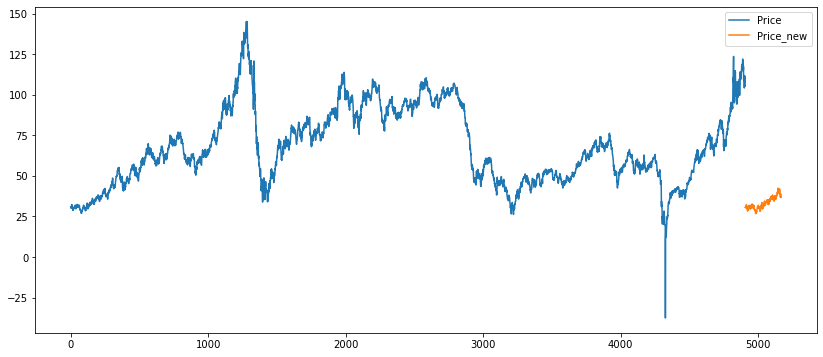

In [91]:
forecasting_plot = full_data[['Price','Price_new']].reset_index(drop=True).plot(figsize=(14,6))
forecasting_plot
plt.show()

Even data driven models also not getting better forecast so we go for ARIMA model.

In [92]:
import itertools
p = range(0,5) #AR order
d = range(0,5) #Shift
q = range(0,5) #MA order
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [93]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train['Price'],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 42396.90697789438
(0, 0, 1) 36407.46640223256
(0, 0, 2) 31704.80836180876
(0, 0, 3) 28491.394383250074
(0, 0, 4) 26172.375839198794
(0, 1, 0) 16878.32266792981
(0, 1, 1) 16868.737186836464
(0, 1, 2) 16868.33453682809
(0, 1, 3) 16869.910520552337
(0, 1, 4) 16865.72118547658
(0, 2, 0) 20310.219849249537
(0, 2, 1) 16885.901946062742
(0, 2, 2) 16876.396622020122
(0, 2, 3) 16876.025272373463
(0, 2, 4) 16877.587968325526
(1, 0, 0) 16885.106064362328
(1, 0, 1) 16876.013244238744
(1, 0, 2) 16875.796486116244
(1, 0, 3) 16877.29093846134
(1, 0, 4) 16872.794630122262
(1, 1, 0) 16869.32357886272
(1, 1, 1) 16869.326300783796
(1, 2, 0) 18905.650852381696
(1, 2, 1) 16876.982250856705
(1, 2, 3) 16872.13435804653
(1, 2, 4) 16878.475613300216
(2, 0, 0) 16876.55530976277
(2, 0, 1) 16876.74290935763
(2, 1, 0) 16867.957537317656
(2, 1, 1) 16869.931423387286
(2, 1, 2) 16859.25929451555
(2, 2, 0) 18266.947724162193
(2, 2, 1) 16875.664171282227
(2, 2, 2) 16880.5380170325
(2, 2, 3) 16882.642983189755

In [94]:
from statsmodels.tsa.arima_model import ARIMA
ARIMAmodel = ARIMA(train['Price'], order=(3, 1, 2)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1,266,typ='levels')
rmse_arima = np.sqrt(np.mean((np.array(test['Price'])-np.array(ARIMA_pred))**2))
rmse_arima


56.0511459333592

### Build the model for entire dataset

In [95]:
data_ddf

,Date,Price,log_price
0,2003-06-02,30.71,3.424588
1,2003-06-03,30.67,3.423285
2,2003-06-04,30.05,3.402863
3,2003-06-05,30.74,3.425565
4,2003-06-06,31.28,3.442979
...,...,...,...
4901,2022-06-27,109.57,4.696564
4902,2022-06-28,111.76,4.716354
4903,2022-06-29,109.78,4.698478
4904,2022-06-30,105.76,4.661172


In [96]:
full_model = ARIMA(data_ddf['Price'], order=(4, 1, 4)) 
full_model = full_model.fit()

### Create forecasting data frame

In [97]:
forecast_data = pd.date_range(start="2022-07-01",end="2023-06-30",freq='B',name='Date')
forecast_data = pd.DataFrame(data=forecast_data,columns=['Date'])
forecast_data

,Date
0,2022-07-01
1,2022-07-04
2,2022-07-05
3,2022-07-06
4,2022-07-07
...,...
256,2023-06-26
257,2023-06-27
258,2023-06-28
259,2023-06-29


### Forecasting the next one year price

In [98]:
pred_forecast = ARIMA_model_fit.predict(1,266,typ='levels')
pred_forecast
forecast_data['Price_new'] = pd.DataFrame(data=pred_forecast,columns=['Price_new'])
forecast_data


,Date,Price_new
0,2022-07-01,NaN
1,2022-07-04,30.719577
2,2022-07-05,30.681991
3,2022-07-06,30.091201
4,2022-07-07,30.722547
...,...,...
256,2023-06-26,37.629166
257,2023-06-27,38.416883
258,2023-06-28,37.552788
259,2023-06-29,37.234244


In [99]:
full_data = pd.concat([data,forecast_data])
full_data

,Date,Price,Open,High,Low,Vol.,Change %,date,Month,Year,Price_log,Price_new
0,2003-06-02,30.71,29.49,30.84,29.49,90.95K,3.89%,02,Jun,2003.0,3.424588,NaN
1,2003-06-03,30.67,30.65,30.86,30.33,59.00K,-0.13%,03,Jun,2003.0,3.423285,NaN
2,2003-06-04,30.05,30.78,31.00,29.90,96.89K,-2.02%,04,Jun,2003.0,3.402863,NaN
3,2003-06-05,30.74,30.05,30.82,29.65,81.56K,2.30%,05,Jun,2003.0,3.425565,NaN
4,2003-06-06,31.28,30.78,31.30,30.65,71.45K,1.76%,06,Jun,2003.0,3.442979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.629166
257,2023-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.416883
258,2023-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.552788
259,2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.234244


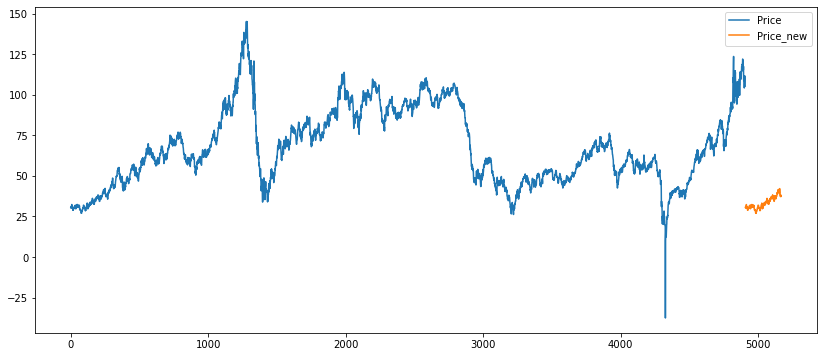

In [100]:
forecasting_plot = full_data[['Price','Price_new']].reset_index(drop=True).plot(figsize=(14,6))
forecasting_plot
plt.show()

Even ARIMA is not forecasting accurectly so we ll go for LSTM